In [3]:
import numpy as np

from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, show, ColumnDataSource, output_notebook
output_notebook()

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

show(layout)



Loading BokehJS ...

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import bokeh as bk

In [7]:
import numpy as np

from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, show, ColumnDataSource, output_notebook
output_notebook()

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0, end=10, value=1, step=1, title="Amplitude")


callback2 = CustomJS(args=dict(source=source, amp=amp_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = A*Math.sin(x[i]);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback2)

layout = row(
    plot,
    column(amp_slider),
)

show(layout)

Loading BokehJS ...

In [8]:
from qutip import *

In [25]:
def plot_wigner_2d_3d(psi):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = figure(y_range=(-10, 10), plot_width=400, plot_height=400)
    ax = fig.add_subplot(1, 2, 1)
    plot_wigner(psi, fig=fig, ax=ax, alpha_max=6);

    plt.close(fig)
    return fig

In [26]:
N = 20
from ipywidgets import interact
interact(plot_wigner_2d_3d, psi=(0,6,1) )

AttributeError: 'Figure' object has no attribute 'add_subplot'

In [62]:

import warnings
import itertools as it
import numpy as np
from numpy import pi, array, sin, cos, angle, log2, sqrt

try:
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    from matplotlib import cm
    from mpl_toolkits.mplot3d import Axes3D
except:
    pass

from qutip.qobj import Qobj, isket
from qutip.states import ket2dm
from qutip.wigner import wigner
from qutip.tensor import tensor
from qutip.matplotlib_utilities import complex_phase_cmap
from qutip.superoperator import vector_to_operator
from qutip.superop_reps import to_super, _super_to_superpauli, _isqubitdims, _pauli_basis
from qutip.tensor import flatten

from qutip import settings



def plot_wigner2(rho, fig=None, ax=None, figsize=(6, 6),
                cmap=None, alpha_max=7.5, colorbar=False,
                method='clenshaw', projection='2d'):
    """
    Plot the the Wigner function for a density matrix (or ket) that describes
    an oscillator mode.
    Parameters
    ----------
    rho : :class:`qutip.qobj.Qobj`
        The density matrix (or ket) of the state to visualize.
    fig : a matplotlib Figure instance
        The Figure canvas in which the plot will be drawn.
    ax : a matplotlib axes instance
        The axes context in which the plot will be drawn.
    figsize : (width, height)
        The size of the matplotlib figure (in inches) if it is to be created
        (that is, if no 'fig' and 'ax' arguments are passed).
    cmap : a matplotlib cmap instance
        The colormap.
    alpha_max : float
        The span of the x and y coordinates (both [-alpha_max, alpha_max]).
    colorbar : bool
        Whether (True) or not (False) a colorbar should be attached to the
        Wigner function graph.
    method : string {'clenshaw', 'iterative', 'laguerre', 'fft'}
        The method used for calculating the wigner function. See the
        documentation for qutip.wigner for details.
    projection: string {'2d', '3d'}
        Specify whether the Wigner function is to be plotted as a
        contour graph ('2d') or surface plot ('3d').
    Returns
    -------
    fig, ax : tuple
        A tuple of the matplotlib figure and axes instances used to produce
        the figure.
    """

    if not fig and not ax:
        if projection == '2d':
            fig, ax = plt.subplots(1, 1, figsize=figsize)
            print(ax)
        elif projection == '3d':
            fig = plt.figure(figsize=figsize)
            ax = fig.add_subplot(1, 1, 1, projection='3d')
        else:
            raise ValueError('Unexpected value of projection keyword argument')

    if isket(rho):
        rho = ket2dm(rho)

    xvec = np.linspace(-alpha_max, alpha_max, 200)
    W0 = wigner(rho, xvec, xvec, method=method)

    W, yvec = W0 if type(W0) is tuple else (W0, xvec)

    wlim = abs(W).max()

    if cmap is None:
        cmap = cm.get_cmap('RdBu')

    if projection == '2d':
        cf = ax.contourf(xvec, yvec, W, 100,
                         norm=mpl.colors.Normalize(-wlim, wlim), cmap=cmap)
    elif projection == '3d':
        X, Y = np.meshgrid(xvec, xvec)
        cf = ax.plot_surface(X, Y, W0, rstride=5, cstride=5, linewidth=0.5,
                             norm=mpl.colors.Normalize(-wlim, wlim), cmap=cmap)
    else:
        raise ValueError('Unexpected value of projection keyword argument.')

    if xvec is not yvec:
        ax.set_ylim(xvec.min(), xvec.max())

    ax.set_xlabel(r'$\rm{Re}(\alpha)$', fontsize=12)
    ax.set_ylabel(r'$\rm{Im}(\alpha)$', fontsize=12)

    if colorbar:
        fig.colorbar(cf, ax=ax)

    ax.set_title("Wigner function", fontsize=12)

    return fig, ax



In [63]:
from ipywidgets import interact

def plot_wigner_2d_3d(psi):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(17, 8))
    
    ax = fig.add_subplot(1, 2, 1)
    plot_wigner2(psi, fig=fig, ax=ax, alpha_max=6);
    
    plt.close(fig)
    return fig

In [64]:
from ipywidgets import interact
def prepare_basis()
interact(plot_wigner_2d_3d, psi=(1,5,1) )


SyntaxError: invalid syntax (<ipython-input-64-28b634ed904a>, line 2)

In [ ]:
def plot_wigner2(rho, fig=None, ax=None, figsize=(6, 6),
                cmap=None, alpha_max=7.5, colorbar=False,
                method='clenshaw', projection='2d'):

    if not fig and not ax:
        if projection == '2d':
            fig, ax = plt.subplots(1, 1, figsize=figsize)
        elif projection == '3d':
            fig = plt.figure(figsize=figsize)
            ax = fig.add_subplot(1, 1, 1, projection='3d')
        else:
            raise ValueError('Unexpected value of projection keyword argument')

    if isket(rho):
        rho = ket2dm(rho)

    xvec = np.linspace(-alpha_max, alpha_max, 200)
    W0 = wigner(rho, xvec, xvec, method=method)

    W, yvec = W0 if type(W0) is tuple else (W0, xvec)

    wlim = abs(W).max()

    if cmap is None:
        cmap = cm.get_cmap('RdBu')

    if projection == '2d':
        cf = ax.contourf(xvec, yvec, W, 100,
                         norm=mpl.colors.Normalize(-wlim, wlim), cmap=cmap)
    elif projection == '3d':
        X, Y = np.meshgrid(xvec, xvec)
        cf = ax.plot_surface(X, Y, W0, rstride=5, cstride=5, linewidth=0.5,
                             norm=mpl.colors.Normalize(-wlim, wlim), cmap=cmap)
    else:
        raise ValueError('Unexpected value of projection keyword argument.')

    if xvec is not yvec:
        ax.set_ylim(xvec.min(), xvec.max())

    ax.set_xlabel(r'$\rm{Re}(\alpha)$', fontsize=12)
    ax.set_ylabel(r'$\rm{Im}(\alpha)$', fontsize=12)

    if colorbar:
        fig.colorbar(cf, ax=ax)

    ax.set_title("Wigner function", fontsize=12)

    return fig, ax

In [49]:
def plot_wigner3(rho, fig=None, ax=None, 
                alpha_max=7.5, 
                method='clenshaw', projection='2d'):
    xvec = np.linspace(-alpha_max, alpha_max, 200)
    W0 = wigner(rho, xvec, xvec, method=method)
    W, yvec = W0 if type(W0) is tuple else (W0, xvec)
    print(W, yvec)


[[4.41286776e-50 1.35922035e-49 4.13927025e-49 ... 4.13927025e-49
  1.35922035e-49 4.41286776e-50]
 [1.35922035e-49 4.18657448e-49 1.27494878e-48 ... 1.27494878e-48
  4.18657448e-49 1.35922035e-49]
 [4.13927025e-49 1.27494878e-48 3.88263577e-48 ... 3.88263577e-48
  1.27494878e-48 4.13927025e-49]
 ...
 [4.13927025e-49 1.27494878e-48 3.88263577e-48 ... 3.88263577e-48
  1.27494878e-48 4.13927025e-49]
 [1.35922035e-49 4.18657448e-49 1.27494878e-48 ... 1.27494878e-48
  4.18657448e-49 1.35922035e-49]
 [4.41286776e-50 1.35922035e-49 4.13927025e-49 ... 4.13927025e-49
  1.35922035e-49 4.41286776e-50]] [-7.5        -7.42462312 -7.34924623 -7.27386935 -7.19849246 -7.12311558
 -7.04773869 -6.97236181 -6.89698492 -6.82160804 -6.74623116 -6.67085427
 -6.59547739 -6.5201005  -6.44472362 -6.36934673 -6.29396985 -6.21859296
 -6.14321608 -6.0678392  -5.99246231 -5.91708543 -5.84170854 -5.76633166
 -5.69095477 -5.61557789 -5.54020101 -5.46482412 -5.38944724 -5.31407035
 -5.23869347 -5.16331658 -5.0879397

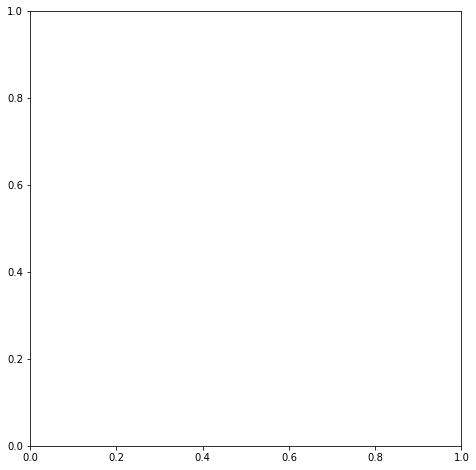

In [55]:
def plot_wigner_2d_3d_3(psi, alpha_max=7.5):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(17, 8))
    xvec = np.linspace(-alpha_max, alpha_max, 200)

    
    ax = fig.add_subplot(1, 2, 1)
    plot_wigner3(psi);
    
    plt.close(fig)
    return fig

psi = basis(N, 0)
plot_wigner_2d_3d_3(psi)